# Machine Learning LAB 1: MODEL SELECTION

Course 2024/25: *F. Chiariotti*

The notebook contains a simple learning task over which we will implement **MODEL SELECTION AND VALIDATION**.

Complete all the **required code sections** and **answer all the questions**.

### IMPORTANT for the exam:

The functions you might be required to implement in the exam will have the same signature and parameters as the ones in the labs

## Polynomial Classification on Signal to Noise Ratios

In this notebook we are going to explore the use of polynomial classification with polynomial regression. We are going to use the Numpy **polyfit** function, which performs polynomial regression.

Our use case is a communication problem: we have a set of measurements of the Signal to Noise Ratio (SNR), i.e., the quality of the communication link, in various positions. The SNR depends on two components: firstly, the noise level (which is a random variable that does not depend on position) and the signal attenuation (usually modeled as a polynomial function of the distance).

Our transmitter is in (0,0), and coordinates are in meters. In urban scenarios, the attenuation usually follows a third-degree polynomial, but it might be a fourth- or fifth-degree polynomial in more complex cases. How do we choose between different degrees? We will try with a maximum of **6**

---

## Import all the necessary Python libraries

In [13]:
import numpy as np
import scipy as sp
import pandas as pd
import itertools
from matplotlib import pyplot as plt

---

## Load the data

In this case, x and y are the two coordinates, and the SNR is the thing we are trying to predict

**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [43]:
df = pd.read_csv('data/snr_measurements.csv',sep=';')
x = df['x'].to_numpy()
y = df['y'].to_numpy()
SNR = df['SNR'].to_numpy()

df

,x,y,SNR
0,40.238833,4.265986,10.175131
1,98.283520,37.818614,3.825913
2,40.218399,70.433962,7.657508
3,62.067195,72.951305,4.979963
4,15.436981,22.427707,11.729007
...,...,...,...
195,69.378761,66.693153,8.378318
196,0.980225,93.372566,6.496289
197,84.321334,81.095003,4.036931
198,92.233200,48.454827,4.672679


## Helper functions

These functions will help us evaluate the results

In [66]:
DistanceFunc = lambda x, y: np.sqrt(x**2 + y**2)


def fit(distance, SNR, degree):
    return np.polyfit(distance, SNR, deg=degree)

def predict(distance, poly_coeffs):
    
    SNR = 0

    for i in range(len(poly_coeffs)):
        SNR += distance**i * poly_coeffs[-i-1]
    
    return SNR

def evaluate(distance, SNR, poly_coeffs):

    PredictSNR = predict(distance, poly_coeffs)
    mse = 0

    for i in range(len(distance)):
        mse += (SNR[i] - PredictSNR[i])**2
     
    return mse/len(distance)

def separate_test(distance, SNR, test_points):
    # TODO: Return a training set and a test set (the test_points parameter controls the number of test points).
    # The points should be selected randomly

    #Drawing from a uniform distribution some random points
    N = len(distance)
    RandomIndex = np.random.choice(range(N), size=N-test_points, replace=False)
    Mask = np.zeros(N, dtype=bool)
    Mask[RandomIndex] = True

    x_train, y_train = distance[Mask], SNR[Mask]

    Mask = np.logical_not(Mask)
    x_test, y_test = distance[Mask], SNR[Mask]


    return x_train, y_train, x_test, y_test

In [71]:
Distance = DistanceFunc(x, y)
FitCoeff = fit(Distance, SNR, 3)
PredictSNR = predict(120, FitCoeff)
MSE = evaluate(Distance, SNR, FitCoeff)

xTrain, yTrain, xTest, yTest = separate_test(Distance, SNR, 50)

150

Text(0, 0.5, 'Signal to Noise Attenuation')

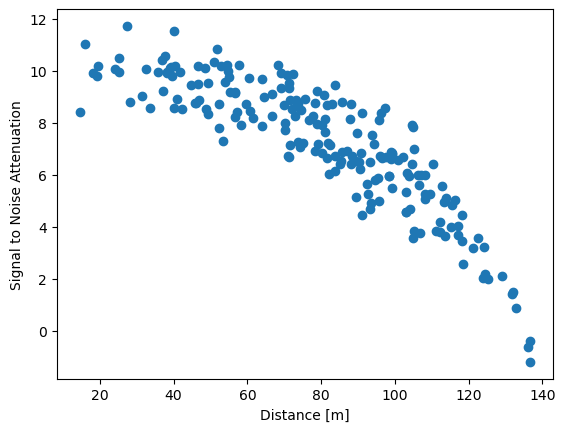

In [29]:
# TODO: separate the training and test sets and create a scatter plot of the SNR as a function of the distance

plt.scatter(DistanceFunc(x, y), SNR )
plt.xlabel("Distance [m]")
plt.ylabel("Signal to Noise Attenuation")

## A. K-fold cross-validation

In this case, x and y are the two coordinates, and the SNR is the thing we are trying to predict

In [5]:
# Function to perform the K-fold cross validation
def k_fold_cross_validation(x_train: np.ndarray, y_train: np.ndarray, k: int, max_degree: int) -> tuple[tuple, tuple]:
    # TODO: Perform K-fold cross-validation on the training set.
    # The two returned values are the best model and the list of results for all degrees up to max_degree.
    # The points should be selected randomly.
    # The inputs and labels are already in terms of distance and SNR
    return best, results

In [6]:
# TODO: run the training with K-fold cross-validation with 40 test points and 4 folds Plot the validation score as a function of the degree

In [7]:
# TODO: get the test performance of the best model and plot the model output and test points. 
# Try running the program multiple times, changing the values of K and the number of test points: is the output always the same?

---

## B. Tikhonov regularization

Change the loss function to include a Tikhonov regularization term, as an alternative to cross-validation (try $\lambda=0.01$)

In [8]:
def evaluate_tikhonov(x_train: np.ndarray, y_train: np.ndarray, lambda_par: float, max_degree: int) -> tuple[tuple, tuple]:
    # TODO: apply Tikhonov regularization AFTER the fitting process

    return best, results

In [9]:
# TODO: run the training with Tikhonov regularization and plot the loss as a function of the degree


## C. Minimum description length regularization

Change the loss function to include a representation length regularization term, as an alternative to cross-validation. The minimum description length of a polynomial of degree N is O(2^N) - try $\lambda=0.02$

In [10]:
def evaluate_representation(x_train: np.ndarray, y_train: np.ndarray, lambda_par: float, max_degree: int) -> tuple[tuple, tuple]:
    # TODO: apply Tikhonov regularization AFTER the fitting process

    return best, results

In [11]:
# TODO: run the training with MDL regularization and plot the loss as a function of the degree

### TEST

Check the performance of the three solutions on the test set: which one does best?


In [12]:
# TODO: plot the results